In [598]:
# Adapted from https://github.com/gkhayes/mlrose

import mlrose
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, mean_squared_error
import itertools

from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns
import random

In [599]:
# Global hyperparameter Adjustment to Run entire book

max_iters = 1000
max_attempts = 500

# N Queens


Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: October 2, 2019.

#### Randomized Hill Climb does well

In [600]:
# Utilizing alternative to find positions where all queens CANNOT attack one another

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    
        # Initialize counter
        fitness_cnt = 0

        # For all pairs of queens
        for i in range(len(state) - 1):
            for j in range(i + 1, len(state)):

                # Check for horizontal, diagonal-up and diagonal-down attacks
                if (state[j] != state[i]) \
                    and (state[j] != state[i] + (j - i)) \
                    and (state[j] != state[i] - (j - i)):

                   # If no attacks, then increment counter
                   fitness_cnt += 1

        return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [601]:
# Initialize fitness function
# fitness = mlrose.Queens()  # Use this for CAN attack

# Define optimization problem
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

### Randomized Hill Climb

In [602]:
start = timer()
best_state, best_fitness, fitness_curve1 = mlrose.random_hill_climb(problem, max_attempts = max_attempts, 
                                                    max_iters = max_iters, restarts = 0, 
                                                    curve = True, init_state=None, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve1.shape)

The best state:  [5 2 0 7 4 1 3 6]
The best fitness:  28.0
The time:  0.0524183909947169
Iteration Count (572,)


### Simulated Annealing

In [603]:
# Define decay schedule
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.95, min_temp = 0.001)
#schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp = 0.001)
#schedule = mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp = 0.001)

start = timer()

best_state, best_fitness, fitness_curve2 = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters, curve = True,
                                                      random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve2.shape)

The best state:  [6 2 7 1 4 0 5 3]
The best fitness:  28.0
The time:  0.0890065860003233
Iteration Count (882,)


### Genetic Algorithm

In [7]:
start = timer()
best_state, best_fitness, fitness_curve3 = mlrose.genetic_alg(problem, pop_size = 200, mutation_prob = 0.2, 
                                                    max_attempts = max_attempts, max_iters = max_iters, 
                                                    curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve3.shape)

The best state:  [1 5 7 2 0 3 6 0]
The best fitness:  27.0
The time:  15.257181181000002
Iteration Count (539,)


### MIMIC

In [8]:
start = timer()
best_state, best_fitness, fitness_curve4 = mlrose.mimic(problem, pop_size = 200, keep_pct = 0.2, 
                                                       max_attempts = 200, max_iters = max_iters, 
                                                       curve = True, random_state = 1,
                                                       fast_mimic = True)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve4.shape)

The best state:  [3 6 0 4 1 7 5 2]
The best fitness:  27.0
The time:  3.854181855
Iteration Count (201,)


In [9]:
my_dict = dict(x = np.arange(1,1001), 
               RHC = fitness_curve1,
               SA = fitness_curve2,
               GA = fitness_curve3, 
               MIMIC = fitness_curve4)

In [10]:
df = pd.DataFrame.from_dict(my_dict, orient='index')
df = df.transpose()
df.head()

,x,RHC,SA,GA,MIMIC
0,1.0,23.0,23.0,25.0,27.0
1,2.0,23.0,23.0,26.0,27.0
2,3.0,23.0,24.0,26.0,27.0
3,4.0,23.0,24.0,26.0,27.0
4,5.0,24.0,24.0,26.0,27.0


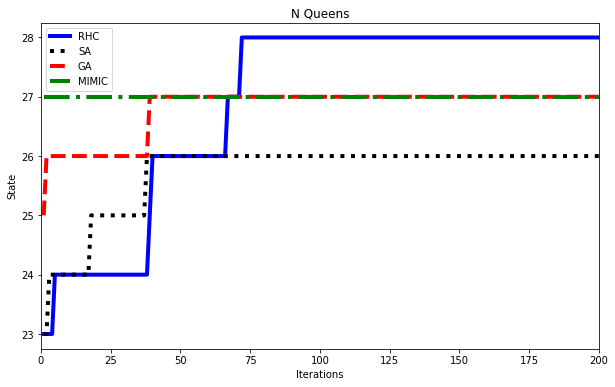

In [11]:
# Adapted from https://python-graph-gallery.com/122-multiple-lines-chart/
plt.figure(figsize=(10,6))
plt.plot( 'x', 'RHC', data=df, marker='', color='blue', linewidth=4, linestyle='-', label="RHC")
plt.plot( 'x', 'SA', data=df, marker='', color='black', linewidth=4, linestyle=':', label="SA")
plt.plot( 'x', 'GA', data=df, marker='', color='red', linewidth=4, linestyle='--', label="GA")
plt.plot( 'x', 'MIMIC', data=df, marker='', color='green', linewidth=4, linestyle='-.', label="MIMIC")
plt.xlim(0, 200)
plt.xlabel('Iterations')
plt.ylabel('State')
plt.title('N Queens')
plt.legend()

# Traveling Salesperson

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: October 2, 2019.

#### GA performs well

In [101]:
# Distance Based
random.seed(1)
dist_list = []
cities = 10
for x in range(cities):
    for y in range(cities):
        random.seed(x + y)
        dist_list.append((x, y, random.uniform(0.0, 1.0)))

In [13]:
# Adapted from https://stackoverflow.com/questions/19668463/generating-multiple-random-x-y-coordinates-excluding-duplicates

# Coordinate Based
radius = 1
rangeX = (0, 10)
rangeY = (0, 10)
qty = 20  # or however many points you want

deltas = set()
for x in range(-radius, radius+1):
    for y in range(-radius, radius+1):
        if x*x + y*y <= radius*radius:
            deltas.add((x,y))

randPoints = []
excluded = set()
i = 0
while i<qty:
    x = random.randrange(*rangeX)
    y = random.randrange(*rangeY)
    if (x,y) in excluded: continue
    randPoints.append((x,y))
    i += 1
    excluded.update((x+dx, y+dy) for (dx,dy) in deltas)

In [102]:
# Create list of city coordinates
# coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]
# Initialize fitness function object using coords_list
#fitness_coords = mlrose.TravellingSales(coords = coords_list)

fitness_dists = mlrose.TravellingSales(distances = dist_list)

# Define optimization problem object
#problem = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize = True)  # Coordinate defined
problem = mlrose.TSPOpt(length = 10, fitness_fn = fitness_dists, maximize = True)  # Distance defined

### Randomized Hill Climb

In [103]:
# Manual experimentation on restarts, attempts, and iteration
# Complex problem difficult for RHC

start = timer()

best_state, best_fitness, fitness_curve1 = mlrose.random_hill_climb(problem, max_attempts = max_attempts, 
                                                    max_iters = max_iters, restarts = 0, 
                                                    curve = True, init_state=None, random_state = 1)
stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve1.shape)

The best state:  [8 9 6 4 1 5 0 2 3 7]
The best fitness:  7.213352822516584
The time:  0.13584263299890154
Iteration Count (614,)


### Simulated Annealing

In [107]:
# Define decay schedule
#schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.95, min_temp = 0.001)
schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.5, min_temp = 0.001)
#schedule = mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp = 0.001)

start = timer()
best_state, best_fitness, fitness_curve2 = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve2.shape)

The best state:  [8 3 9 6 0 2 4 1 5 7]
The best fitness:  7.290961412055101
The time:  0.14891231899855484
Iteration Count (647,)


### Genetic Algorithm

In [17]:
# Manual alteration of hyperparameters
# Solve problem using the genetic algorithm
start = timer()
best_state, best_fitness, fitness_curve3 = mlrose.genetic_alg(problem, mutation_prob = 0.1, pop_size = 200,
                                              max_attempts = max_attempts, max_iters = max_iters, 
                                              curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve3.shape)

The best state:  [9 6 0 2 4 1 5 7 8 3]
The best fitness:  7.290961412055101
The time:  33.055409736
Iteration Count (574,)


### MIMIC

In [104]:
start = timer()
best_state, best_fitness, fitness_curve4 = mlrose.mimic(problem, pop_size = 600, keep_pct = 0.2, 
                                               max_attempts = max_attempts, max_iters = max_iters, 
                                               curve = True, random_state = 1, fast_mimic = False)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve4.shape)

The best state:  [0 6 9 8 7 5 1 4 3 2]
The best fitness:  7.039389465530429
The time:  395.80344362100004
Iteration Count (505,)


In [19]:
my_dict = dict(x = np.arange(1,1001), 
               RHC = fitness_curve1,
               SA = fitness_curve2,
               GA = fitness_curve3, 
               MIMIC = fitness_curve4)

In [20]:
df = pd.DataFrame.from_dict(my_dict, orient='index')
df = df.transpose()
df.head()

,x,RHC,SA,GA,MIMIC
0,1.0,5.908543,5.908543,6.640818,6.887022
1,2.0,5.908543,5.908543,7.194422,6.946266
2,3.0,5.908543,5.759602,7.194422,6.946266
3,4.0,6.392524,5.455246,7.194422,6.946266
4,5.0,6.392524,5.238831,7.194422,6.946266


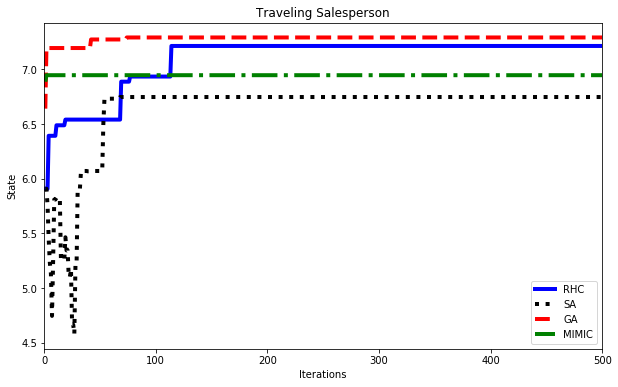

In [21]:
# Adapted from https://python-graph-gallery.com/122-multiple-lines-chart/
plt.figure(figsize=(10,6))
plt.plot( 'x', 'RHC', data=df, marker='', color='blue', linewidth=4, linestyle='-', label="RHC")
plt.plot( 'x', 'SA', data=df, marker='', color='black', linewidth=4, linestyle=':', label="SA")
plt.plot( 'x', 'GA', data=df, marker='', color='red', linewidth=4, linestyle='--', label="GA")
plt.plot( 'x', 'MIMIC', data=df, marker='', color='green', linewidth=4, linestyle='-.', label="MIMIC")
plt.xlim(0, 500)
plt.xlabel('Iterations')
plt.ylabel('State')
plt.title('Traveling Salesperson')
plt.legend()

# Continuous Peaks

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and Search package for Python. https://github.com/gkhayes/mlrose. Accessed: October 2, 2019.

#### Simulated Annealing performs best

In [80]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.ContinuousPeaks(t_pct=0.15)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

### Random Hill Climb

In [92]:
start = timer()
best_state, best_fitness, fitness_curve1 = mlrose.random_hill_climb(problem, max_attempts = max_attempts, 
                                                    max_iters = 5000, restarts = 0, 
                                                    curve = True, init_state = None, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve1.shape)

The best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The best fitness:  100.0
The time:  0.20557573600012802
Iteration Count (2331,)


### Simulated Annealing

In [93]:
# Define decay schedule

schedule = mlrose.GeomDecay(init_temp=10.0, decay=0.97, min_temp = 0.001)
#schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp = 0.001)
#schedule = mlrose.ArithDecay(init_temp=1.0, decay=0.001, min_temp = 0.001)

start = timer()
best_state, best_fitness, fitness_curve2 = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = 5000, curve = True,
                                                      random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve2.shape)

The best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The best fitness:  184.0
The time:  0.5212451510001301
Iteration Count (4862,)


### Genetic Algorithm

In [90]:
# Solve problem using the genetic algorithm
start = timer()
best_state, best_fitness, fitness_curve3 = mlrose.genetic_alg(problem, pop_size = 200, mutation_prob = 0.1,
                                              max_attempts = max_attempts, max_iters = 5000,
                                              curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve3.shape)

The best state:  [1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1]
The best fitness:  25.0
The time:  54.26749126100003
Iteration Count (549,)


### MIMIC

In [91]:
start = timer()
best_state, best_fitness, fitness_curve4 = mlrose.mimic(problem, pop_size = 200, keep_pct = 0.2, 
                                               max_attempts = max_attempts, max_iters = 5000, 
                                               curve = True, random_state = 1,
                                               fast_mimic = True)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve4.shape)

The best state:  [1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
The best fitness:  118.0
The time:  44.91225299299981
Iteration Count (520,)


In [94]:
my_dict = dict(x = np.arange(1,1001), 
               RHC = fitness_curve1,
               SA = fitness_curve2,
               GA = fitness_curve3, 
               MIMIC = fitness_curve4)

In [95]:
df = pd.DataFrame.from_dict(my_dict, orient='index')
df = df.transpose()

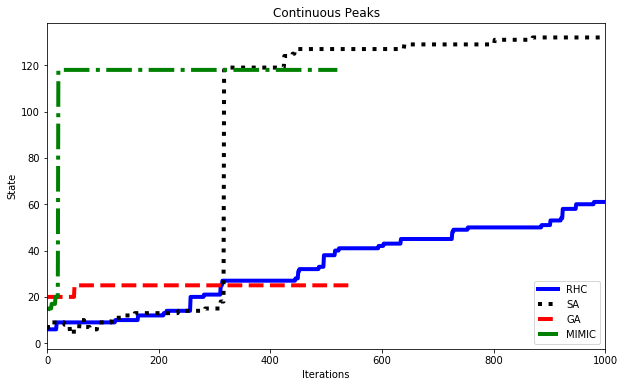

In [96]:
# Adapted from https://python-graph-gallery.com/122-multiple-lines-chart/
plt.figure(figsize=(10,6))
plt.plot( 'x', 'RHC', data=df, marker='', color='blue', linewidth=4, linestyle='-', label="RHC")
plt.plot( 'x', 'SA', data=df, marker='', color='black', linewidth=4, linestyle=':', label="SA")
plt.plot( 'x', 'GA', data=df, marker='', color='red', linewidth=4, linestyle='--', label="GA")
plt.plot( 'x', 'MIMIC', data=df, marker='', color='green', linewidth=4, linestyle='-.', label="MIMIC")
plt.xlim(0, 1000)
plt.xlabel('Iterations')
plt.ylabel('State')
plt.title('Continuous Peaks')
plt.legend()

# Knapsack

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: October 2, 2019.

#### MIMIC performs best

In [97]:
weights = np.array([2, 10, 3, 5, 13, 7, 3, 11, 4, 16])
values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Initialize fitness function object using pre-defined class
fitness = mlrose.Knapsack(weights, values, max_weight_pct = 0.75)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length=10, fitness_fn=fitness, maximize=True)

### Randomized Hill Climb

In [99]:
start = timer()
best_state, best_fitness, fitness_curve1 = mlrose.random_hill_climb(problem, max_attempts = max_attempts, 
                                                    max_iters = 1000, restarts = 0, 
                                                    curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve1.shape)

The best state:  [1 1 1 0 1 1 1 1 1 0]
The best fitness:  41.0
The time:  0.02721932599979482
Iteration Count (506,)


### Simulated Annealing

In [100]:
# Define decay schedule
#schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.95, min_temp = 0.001)
schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp = 0.001)
#schedule = mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp = 0.001)
start = timer()
best_state, best_fitness, fitness_curve2 = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve2.shape)

The best state:  [1 0 1 1 1 1 1 1 1 0]
The best fitness:  43.0
The time:  0.04719088699994245
Iteration Count (691,)


### Genetic Algorithm

In [33]:
# Solve problem using the genetic algorithm
start = timer()
best_state, best_fitness, fitness_curve3 = mlrose.genetic_alg(problem, pop_size = 200, mutation_prob = 0.2,
                                              max_attempts = max_attempts, max_iters = max_iters,
                                              curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve3.shape)

The best state:  [1 0 1 1 0 1 1 1 1 1]
The best fitness:  48.0
The time:  10.595785406000005
Iteration Count (509,)


### MIMIC

In [34]:
#pop_size = [50, 100, 200, 300, 500]
#keep_pct = [.1, .2, .4, .6, .8]
#count = 0
#while count < 5:
start = timer()
best_state, best_fitness, fitness_curve4 = mlrose.mimic(problem, pop_size = 400, keep_pct = .1, 
                                                           max_attempts = max_attempts, max_iters = max_iters, 
                                                           curve = True, random_state = None,
                                                           fast_mimic = True)
stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve4.shape)    

The best state:  [1 0 1 1 0 1 1 1 1 1]
The best fitness:  48.0
The time:  5.0447277850000205
Iteration Count (501,)


In [35]:
my_dict = dict(x = np.arange(1,1001), 
               RHC = fitness_curve1,
               SA = fitness_curve2,
               GA = fitness_curve3, 
               MIMIC = fitness_curve4)

In [36]:
df = pd.DataFrame.from_dict(my_dict, orient='index')
df = df.transpose()
df.head()

,x,RHC,SA,GA,MIMIC
0,1.0,38.0,38.0,46.0,48.0
1,2.0,38.0,38.0,46.0,48.0
2,3.0,38.0,38.0,46.0,48.0
3,4.0,38.0,38.0,46.0,48.0
4,5.0,38.0,41.0,46.0,48.0


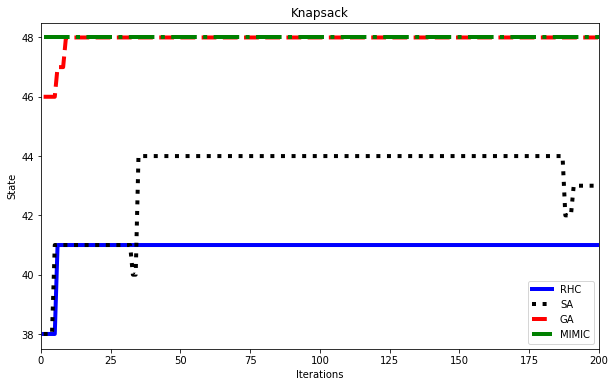

In [37]:
# Adapted from https://python-graph-gallery.com/122-multiple-lines-chart/
plt.figure(figsize=(10,6))
plt.plot( 'x', 'RHC', data=df, marker='', color='blue', linewidth=4, linestyle='-', label="RHC")
plt.plot( 'x', 'SA', data=df, marker='', color='black', linewidth=4, linestyle=':', label="SA")
plt.plot( 'x', 'GA', data=df, marker='', color='red', linewidth=4, linestyle='--', label="GA")
plt.plot( 'x', 'MIMIC', data=df, marker='', color='green', linewidth=4, linestyle='-.', label="MIMIC")
plt.xlim(0, 200)
plt.xlabel('Iterations')
plt.ylabel('State')
plt.title('Knapsack')
plt.legend()

# 4 Peaks

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: October 2, 2019.

#### MIMIC Performs Best

In [38]:
fitness = mlrose.FourPeaks(t_pct=0.10)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

### Random Hill Climb

In [39]:
start = timer()
best_state, best_fitness, fitness_curve1 = mlrose.random_hill_climb(problem, max_attempts = max_attempts, 
                                                    max_iters = max_iters, restarts = 0, 
                                                    curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve1.shape)

The best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0
 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1]
The best fitness:  23.0
The time:  0.030519061000006786
Iteration Count (1000,)


### Simulated Annealing

In [40]:
# Define decay schedule
#schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.95, min_temp = 0.001)
schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp = 0.001)
#schedule = mlrose.ArithDecay(init_temp=1.0, decay=0.0001, min_temp = 0.001)
start = timer()
best_state, best_fitness, fitness_curve2 = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve2.shape)

The best state:  [1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The best fitness:  19.0
The time:  0.051768742999968254
Iteration Count (1000,)


### Genetic Algorithm

In [41]:
# Solve problem using the genetic algorithm
start = timer()
best_state, best_fitness, fitness_curve3 = mlrose.genetic_alg(problem, pop_size = 200, mutation_prob = 0.2,
                                              max_attempts = max_attempts, max_iters = max_iters,
                                              curve = True, random_state = 1)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve3.shape)

The best state:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
The best fitness:  114.0
The time:  15.276883718999954
Iteration Count (581,)


### MIMIC

In [42]:
start = timer()
best_state, best_fitness, fitness_curve4 = mlrose.mimic(problem, pop_size = 200, keep_pct = 0.2, 
                                                       max_attempts = max_attempts, max_iters = max_iters, 
                                                       curve = True, random_state = 1,
                                                       fast_mimic = True)

stop = timer()
print("The best state: ", best_state)
print("The best fitness: ", best_fitness)
print("The time: ", stop - start)
print("Iteration Count", fitness_curve4.shape)

The best state:  [1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The best fitness:  124.0
The time:  32.834833269
Iteration Count (512,)


In [43]:
my_dict = dict(x = np.arange(1,1001), 
               RHC = fitness_curve1,
               SA = fitness_curve2,
               GA = fitness_curve3, 
               MIMIC = fitness_curve4)

In [44]:
df = pd.DataFrame.from_dict(my_dict, orient='index')
df = df.transpose()
df.head()

,x,RHC,SA,GA,MIMIC
0,1.0,2.0,2.0,9.0,11.0
1,2.0,2.0,2.0,9.0,15.0
2,3.0,2.0,2.0,10.0,15.0
3,4.0,2.0,2.0,10.0,15.0
4,5.0,2.0,2.0,15.0,16.0


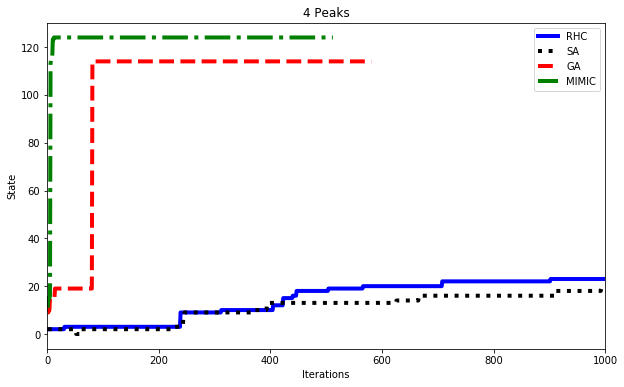

In [45]:
# Adapted from https://python-graph-gallery.com/122-multiple-lines-chart/
plt.figure(figsize=(10,6))
plt.plot( 'x', 'RHC', data=df, marker='', color='blue', linewidth=4, linestyle='-', label="RHC")
plt.plot( 'x', 'SA', data=df, marker='', color='black', linewidth=4, linestyle=':', label="SA")
plt.plot( 'x', 'GA', data=df, marker='', color='red', linewidth=4, linestyle='--', label="GA")
plt.plot( 'x', 'MIMIC', data=df, marker='', color='green', linewidth=4, linestyle='-.', label="MIMIC")
plt.xlim(0, 1000)
plt.xlabel('Iterations')
plt.ylabel('State')
plt.title('4 Peaks')
plt.legend()

# =======================================
# Neural Network Optimization - Red & White Wine
# =======================================

In [494]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV

wineData = pd.read_csv('redwhitedata.csv', delimiter=',')

In [495]:
# Adapted from https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greys):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.tight_layout()
    
    return plt

In [496]:
# Plot learning curves
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.close()
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")

### Process Data

In [497]:
wineData.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [498]:
wineData = wineData.drop('Unnamed: 0', axis=1)  # Random column showing up-- DROP it, no, you Drop it
wineData = wineData.sample(frac=1).reset_index(drop=True)  # Shuffle red and white

In [499]:
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.34,0.29,7.6,0.047,45.0,232.0,0.9955,3.35,0.62,10.0,6
1,6.4,0.17,0.27,6.7,0.036,88.0,223.0,0.9948,3.28,0.35,10.2,6
2,7.4,0.21,0.27,1.2,0.041,27.0,99.0,0.9927,3.19,0.33,9.8,6
3,8.2,0.28,0.42,1.8,0.031,30.0,93.0,0.9917,3.09,0.39,11.4,5
4,7.6,0.41,0.33,2.5,0.078,6.0,23.0,0.9957,3.30,0.58,11.2,5


In [500]:
#Build out classification on quality split from Assignment 1
badWine = wineData.loc[wineData['quality'] <= 6].index
goodWine = wineData.loc[wineData['quality'] > 6].index
wineData.iloc[badWine, wineData.columns.get_loc('quality')] = 0
wineData.iloc[goodWine, wineData.columns.get_loc('quality')] = 1

In [501]:
wineData['quality'].value_counts()

0    2616
1     582
Name: quality, dtype: int64

In [502]:
X = wineData.drop('quality',axis=1)
y = wineData['quality']

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [504]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Artificial Neural Network - Backpropogation

In [505]:
# Best Params from Assignment 1
ann = MLPClassifier(hidden_layer_sizes=(5,), 
                    max_iter=1000, 
                    alpha = 0.1,
                    learning_rate_init = .01,
                    activation = 'tanh',
                    shuffle = True,
                    early_stopping = True,
                    solver = 'lbfgs',
                    random_state = 1)

In [506]:
start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  0.3388095330010401


In [508]:
y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X, y, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Test Score:  0.8265625
Accuracy Train Score: 0.8696558915537018
Cross Value: 0.83 (+/- 0.01)
----
Precision Score : 0.6038961038961039
Recall Score : 0.3661417322834646
F1 Score : 0.45588235294117646
----
RMSE: 0.1734375
----
Confusion Matrix : 
[[965  61]
 [161  93]]


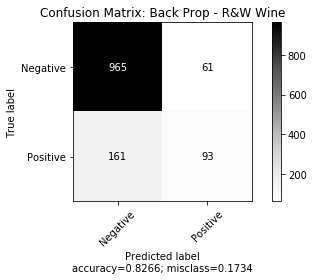

In [509]:
np.set_printoptions(precision=2)
cm = confusion_matrix(y_test, y_pred)
plt_cm = plot_confusion_matrix(cm, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('Back Prop', 'R&W Wine'))
plt_cm.show()

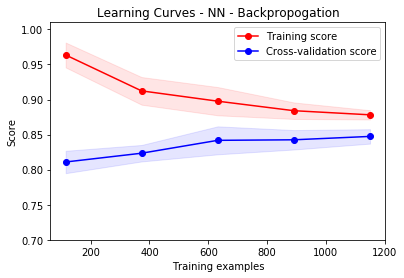

In [510]:
# Plot learning curve
title = "Learning Curves - NN - Backpropogation"
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.grid()
plt.show()

### Artificial Neural Network - Random Hill Climb

In [511]:
ann = mlrose.NeuralNetwork(hidden_nodes=[1], activation='tanh',
                           algorithm = 'random_hill_climb',
                           is_classifier = True, early_stopping = True,
                           max_attempts = 200, max_iters = 5000,
                           bias = True, learning_rate = .5,
                           restarts=0, curve = True, random_state=1)

In [512]:
start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  0.7729987310012802


In [513]:
# Iteration size
ann.fitness_curve.size

690

In [514]:
RHC = ann.fitness_curve

In [516]:
y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X, y, cv=10)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Test Score:  0.8234375
Accuracy Train Score: 0.8342022940563086
Cross Value: 0.82 (+/- 0.00)
----
Precision Score : 0.6206896551724138
Recall Score : 0.28346456692913385
F1 Score : 0.38918918918918916
----
RMSE: 0.1765625
----
Confusion Matrix : 
[[982  44]
 [182  72]]


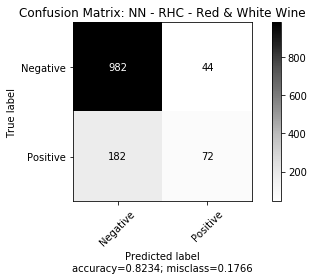

In [517]:
cm = confusion_matrix(y_test, y_pred)
plt_cm = plot_confusion_matrix(cm, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('NN - RHC', 'Red & White Wine'))
plt_cm.show()

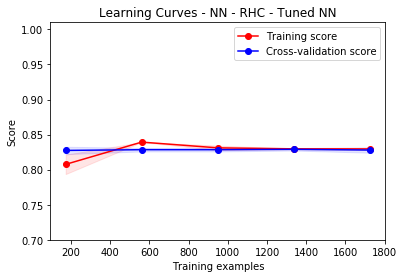

In [518]:
# Plot learning curve
title = "Learning Curves - NN - RHC - Tuned NN"
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.7, 1.01), cv=10, n_jobs=-1)
plt.grid()
plt.show()

### Artificial Neural Network - Simulated Annealing

In [529]:
ann = mlrose.NeuralNetwork(hidden_nodes=[1], activation='tanh',
                           algorithm='simulated_annealing', is_classifier=True,
                           early_stopping = True, random_state = 1,
                           max_attempts = 200, max_iters = 5000,
                           bias = True, learning_rate = .1, curve = True,
                           schedule=mlrose.GeomDecay(init_temp=100.0, decay=0.95, min_temp=0.00001))

In [530]:
start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  4.995383879999281


In [531]:
# Iteration size
ann.fitness_curve.size

4124

In [532]:
SA = ann.fitness_curve

In [533]:
y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X, y, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Test Score:  0.83046875
Accuracy Train Score: 0.8420229405630866
Cross Value: 0.82 (+/- 0.00)
----
Precision Score : 0.6637168141592921
Recall Score : 0.2952755905511811
F1 Score : 0.40871934604904625
----
RMSE: 0.16953125
----
Confusion Matrix : 
[[988  38]
 [179  75]]


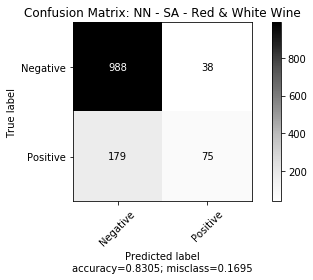

In [534]:
c_matrix = confusion_matrix(y_test, y_pred)
plt_c_matrix = plot_confusion_matrix(c_matrix, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('NN - SA', 'Red & White Wine'))
plt_c_matrix.show()

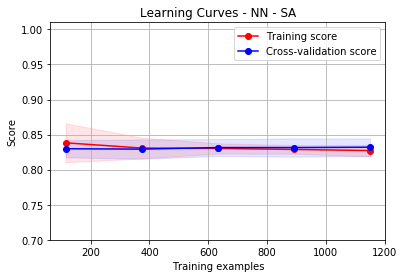

In [535]:
# Plot learning curve
title = "Learning Curves - NN - SA"
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.grid()
plt.show()

### Artificial Neural Network - Genetic Algorithm

In [587]:
ann = mlrose.NeuralNetwork(hidden_nodes=[1], activation='tanh',
                           algorithm='genetic_alg', is_classifier = True,
                           early_stopping = True, random_state=1,
                           pop_size = 200,
                           max_attempts = 100, max_iters = 5000,
                           bias = True, learning_rate = .3,
                           mutation_prob=0.2, curve = True)

In [588]:
import warnings
warnings.filterwarnings('ignore')

In [589]:
start = timer()
ann.fit(X_train, y_train)
end = timer()
print("Time for fit: ", end - start)

Time for fit:  29.00061014899984


In [590]:
# Iteration size
ann.fitness_curve.size

145

In [591]:
GA = ann.fitness_curve

In [592]:
y_pred = ann.predict(X_test)
ann_acc = accuracy_score(y_test, y_pred)
y_pred_train = ann.predict(X_train)
ann_acc_train = accuracy_score(y_train, y_pred_train)
scores = cross_val_score(ann, X, y, cv=5)
print("Accuracy Test Score: ", ann_acc)
print("Accuracy Train Score:", ann_acc_train)
print("Cross Value: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("----")
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print("----")
print('RMSE: ' + str(mean_squared_error(y_test, y_pred)))
print("----")
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Test Score:  0.81953125
Accuracy Train Score: 0.8404588112617309
Cross Value: 0.82 (+/- 0.00)
----
Precision Score : 0.6055045871559633
Recall Score : 0.25984251968503935
F1 Score : 0.36363636363636365
----
RMSE: 0.18046875
----
Confusion Matrix : 
[[983  43]
 [188  66]]


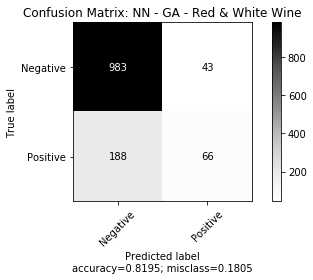

In [593]:
c_matrix = confusion_matrix(y_test, y_pred)
plt_c_matrix = plot_confusion_matrix(c_matrix, ['Negative', 'Positive'],
                                    title='Confusion Matrix: {} - {}'.format('NN - GA', 'Red & White Wine'))
plt_c_matrix.show()

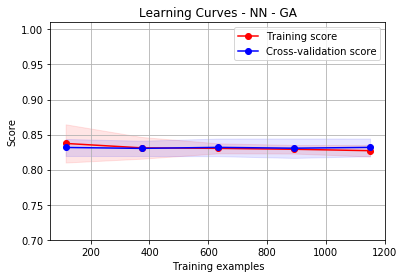

In [594]:
# Plot learning curve
title = "Learning Curves - NN - GA"
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=1)
plot_learning_curve(ann, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.grid()
plt.show()

In [595]:
my_dict = dict(x = np.arange(1,1001), RHC=RHC/-1, SA=SA/-1, GA=GA/-1)

In [596]:
df = pd.DataFrame.from_dict(my_dict, orient='index')
df = df.transpose()
df.head()

,x,RHC,SA,GA
0,1.0,0.779312,0.783514,5.76247
1,2.0,0.779312,0.786385,5.76247
2,3.0,0.733899,0.783241,5.76247
3,4.0,0.717585,0.791743,5.76247
4,5.0,0.717585,0.788644,5.76247


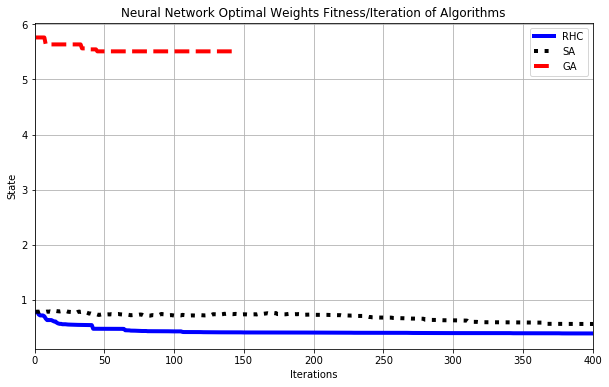

In [597]:
# Adapted from https://python-graph-gallery.com/122-multiple-lines-chart/
plt.figure(figsize=(10,6))
plt.plot( 'x', 'RHC', data=df, marker='', color='blue', linewidth=4, linestyle='-', label="RHC")
plt.plot( 'x', 'SA', data=df, marker='', color='black', linewidth=4, linestyle=':', label="SA")
plt.plot( 'x', 'GA', data=df, marker='', color='red', linewidth=4, linestyle='--', label="GA")
plt.xlim(0, 400)
plt.xlabel('Iterations')
plt.ylabel('State')
plt.title('Neural Network Optimal Weights Fitness/Iteration of Algorithms')
plt.legend()
plt.grid()